# Analysis II

Once we have the processed data we study cases to take a decision. First let's see how the volatility, risk and total return have been changed along on different periods. Let's choose period from 2010, 2020 to 2023, and the months has passed of this year.

#### Graphical Report from 2010-2023 (yearly), 2020-2023 (monthly) and 2023 (weekly), respectively.

<img src="./.src/vrt_2010.png" alt="2010 inform" width="400" height="300">
<img src="./.src/vrt_2020.png" alt="2020 inform" width="400" height="300">
<img src="./.src/vrt_2023.png" alt="2023 inform" width="800" height="600">


Well in the first two graphics we can appreciate Energy sector has great returns and volatility, which means if our cliente thinks in long or middle-term investments it coulb be a good idea because due to great volatility and returns the dividends they could get it would benefit them. However, if they think in short-term that could not be the right. Since the last figure shows us that this sector still registers a great volatility comparated to other sector, but the returns right now are not good, so the client would eventually lose their capital.

Then if our cliente decises to invest in long middle-term we shall consider the sub-industries and what is the principal activities these realises.

Let's see the industry's performing throughout the same periods.

<img src="./.src/sub_2010.png" alt="2010 inform" width="400" height="300">
<img src="./.src/sub_2020.png" alt="2020 inform" width="400" height="300">
<img src="./.src/sub_2023.png" alt="2023 inform" width="800" height="600">

We can appreacite intersting patterns, first all sub industries have had same volatility, second right now the sub industry responsible for Oil-Gas Exploration and production goes down, maybe the sector for renewable energies has growth to replace the industries basen on fuel.

Furthermore, the best subindustries to invest on it would be Oil-Gas Refining and Oil-Gas Equipment and service, which have great returns and volatility, that leads to better gains.

In order to the previous analysis, let's see what companies would be the better to invest on, within the sub industries **Oil-Gas Refining and Marketing** and **Oil-Gas Equipment and Service**.

### Stock Analysis

In [1]:
from get_dataset import Finance
from get_dataset import MACD, global_return
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import pandas as pd

F = Finance()

sector = 'Energy'
sub = F.get_subindustry(sector)
stock_rm = F.get_stock(sector, sub[-1])
stock_es = F.get_stock(sector, sub[1])
start_date = '2019-01-01'
df_rm = [MACD(sector, sub, s, start_date).reset_index() for s in stock_rm]
df_es = [MACD(sector, sub, s, start_date).reset_index() for s in stock_es]
df_es[0].head()

,Date,Open,High,Low,Close,BKR,Volume,Returns,EMA-12,EMA-26,MACD,Signal,Histogram
0,2019-01-02,21.190001,21.629999,20.840000,21.049999,18.362785,7150000,-2.09,18.621259,19.244669,-0.623410,-0.793725,0.170315
1,2019-01-03,21.090000,21.350000,20.540001,20.910000,18.240660,6672900,-0.67,18.562705,19.170298,-0.607593,-0.756499,0.148906
2,2019-01-04,21.340000,22.120001,21.270000,21.959999,19.156618,5040400,5.02,18.654077,19.169285,-0.515208,-0.708241,0.193032
3,2019-01-07,21.940001,22.750000,21.820000,22.549999,19.671295,4740000,2.69,18.810572,19.206471,-0.395899,-0.645772,0.249873
4,2019-01-08,22.830000,23.270000,22.639999,23.209999,20.247042,4959100,2.93,19.031567,19.283550,-0.251983,-0.567015,0.315031


#### MACD

From the Moving Average Convergence Divergence (MACD) for each company we are going to determinate whether it is a good time to invest. The values above zero in the MACD graphic indicate that the short-term moving average is higher than the long-term moving average, which suggests a bullish trend. Conversely, values below zero indicate that the short-term moving average is lower than the long-term moving average, which suggests a bearish trend.

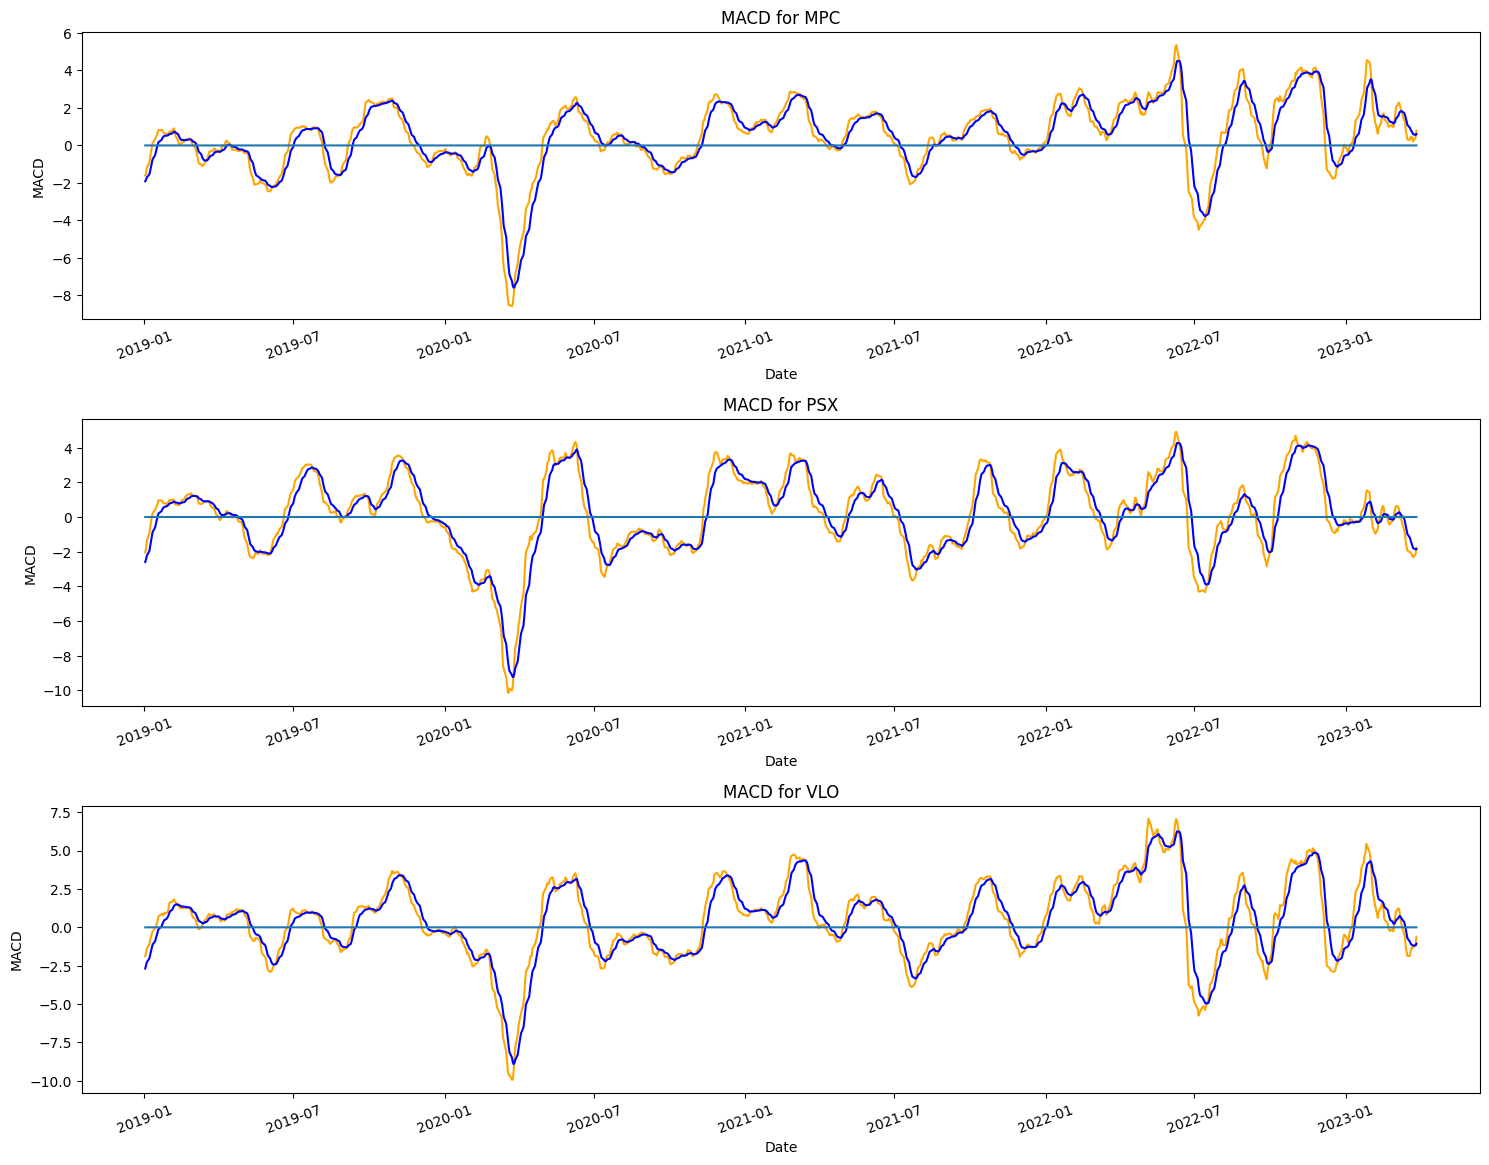

In [2]:
plt.figure(figsize=(15,15))
## MACD for the Oil-Gas Refining and Marketing's stocks
for ii, df in enumerate(df_rm):
    plt.subplot(len(df_rm)+1, 1, ii+1)
    ax = sns.lineplot(x='Date', y='MACD', data=df[['Date','MACD']], color='orange')
    ax = sns.lineplot(x='Date', y='Signal', data=df[['Date','Signal']], color='blue')
    plt.plot(df['Date'].values, np.zeros(len(df['Date'].values)))
    plt.title('MACD for {}'.format(stock_rm[ii]))
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

Then we could conclude from this figure it is better to invest on the company 'MPC' since this stock suggests a bullish trend.

On the other hand for the industry Oil-Gas Equipment and Service, we find

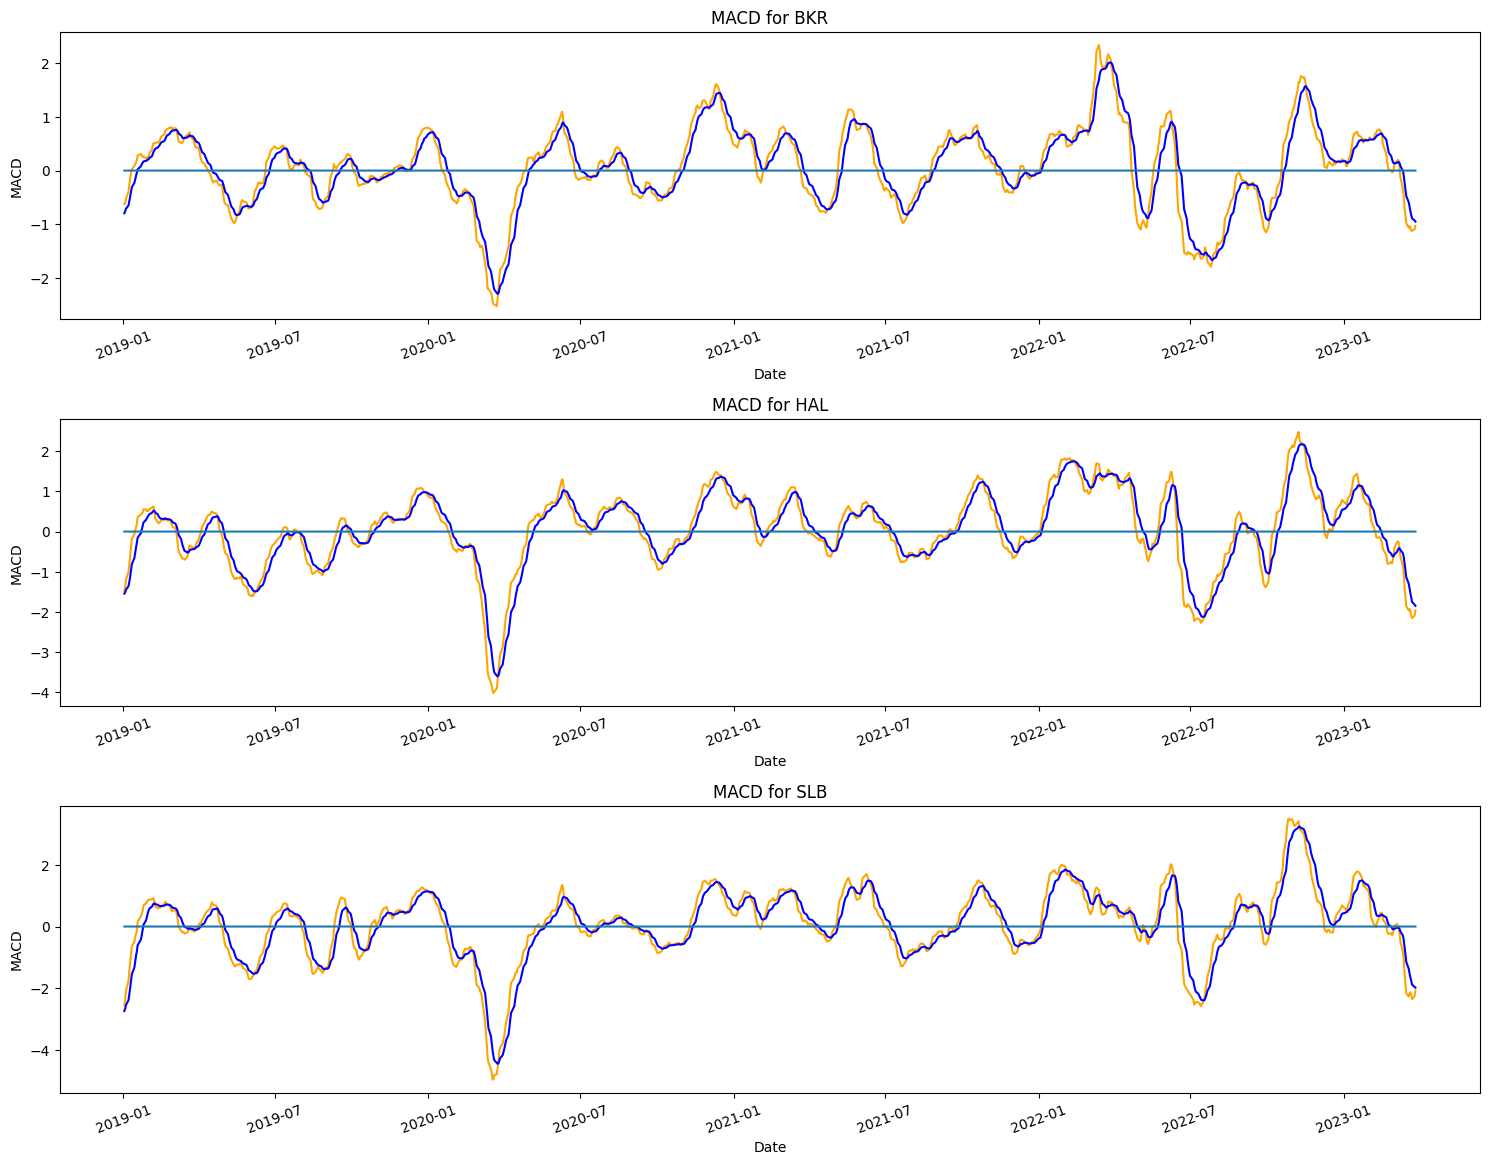

In [3]:
plt.figure(figsize=(15,15))
## MACD for the Oil-Gas Equipment and Service's stocks
for ii, df in enumerate(df_es):
    plt.subplot(len(df_es)+1, 1, ii+1)
    ax = sns.lineplot(x='Date', y='MACD', data=df[['Date','MACD']], color='orange')
    ax = sns.lineplot(x='Date', y='Signal', data=df[['Date','Signal']], color='blue')
    plt.plot(df['Date'].values, np.zeros(len(df['Date'].values)))
    plt.title('MACD for {}'.format(stock_es[ii]))
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

In this case, it would not be a good idea to invest on any stock in the sub-industry of Oil-Gas Equipment and Service.

### KPIs

#### Actual Return
With this KPI we know the total return for each company.

#### Return on Investment (ROI)
This kPI measures the profitability of an investment as a percentage of the initial investment amount. A higher ROI indicates better returns and can be an indicator of a strong investment opportunity.

#### Volatility (Beta)
Measures the profit or loss generated by an investment relative to its cost. Beside, measures how much a sector's returns move in relation to the returns of the overall market. A sector with a beta greater than 1 is more volatile than the market, while a beta less than 1 is less volatile than the market. A negative beta indicates that the sector moves in the opposite direction of the market.

<img src="./.src/kpis1.png" alt="2010 inform" width="800" height="600">
<img src="./.src/kpis2.png" alt="2010 inform" width="800" height="600">

Finally we find out that the best company in the Energy sector to investo on is the **MPC** stock, which suggests a bullish trend, has the greatest ROI, and a significative volatility.